# Data Analysis

## 

In [1]:
import pandas as pd
import numpy as np
import analysis_functions as af


# Load the CSV file
file_path = 'C:\\Users\\USER\\Documents\\GitHub\\project_final\\1_data_cleaning\\data_cleaned.csv'
df_analysis = pd.read_csv(file_path)

In [2]:
df_analysis

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [3]:
# Step 2: Calculate Purchase Amount and Apply Descriptive Statistics
df_analysis = af.calculate_purchase_amount(df_analysis)
stats = af.calculate_descriptive_stats(df_analysis)
print("Descriptive Statistics:\n", stats)

Descriptive Statistics:
 {'mean_purchase_amount': 17.98779487699964, 'median_purchase_amount': 9.75, 'mode_purchase_amount': 15.0, 'mean_quantity': 9.55224954743324, 'median_quantity': 3.0, 'mode_quantity': 1}


In [4]:
# Step 3: Identify Top Product Categories
top_categories = af.get_top_categories(df_analysis)
print("Top Product Categories:\n", top_categories)

Top Product Categories:
 description
PICNIC BASKET WICKER 60 PIECES      19809.75
TEA TIME TEA TOWELS                  3022.50
MISELTOE HEART WREATH CREAM           996.00
SET/5 RED SPOTTY LID GLASS BOWLS      734.40
WEEKEND BAG VINTAGE ROSE PAISLEY      527.85
Name: total_purchase, dtype: float64


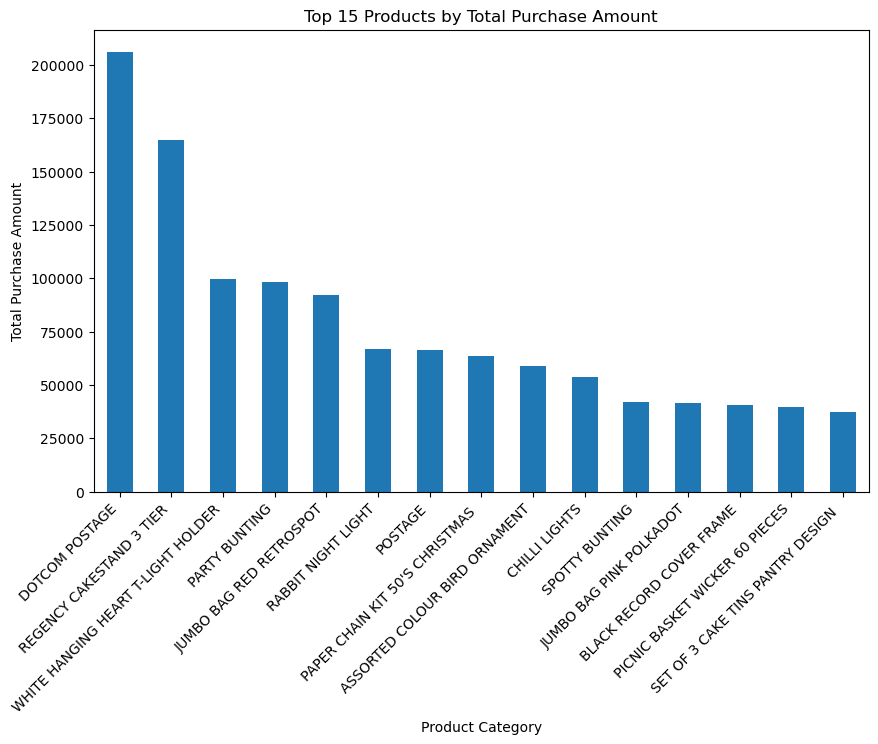

In [5]:
# Step 4: Data Visualization
# 4.1 Bar Chart: Distribution of Purchases across the Top 15 Product Categories
af.plot_bar_chart(df_analysis)

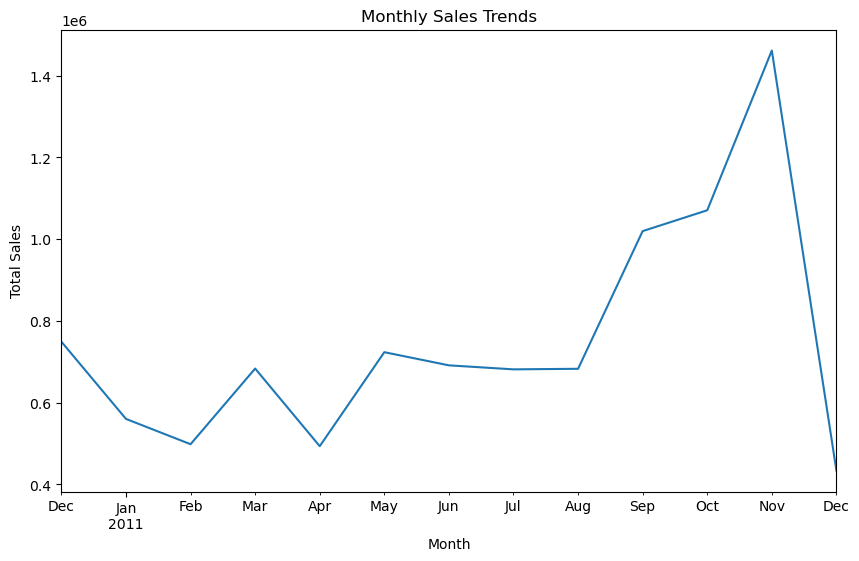

In [7]:
# 4.2 Line Graph: Visualize Sales Trends Over Time
af.plot_line_graph(df_analysis)

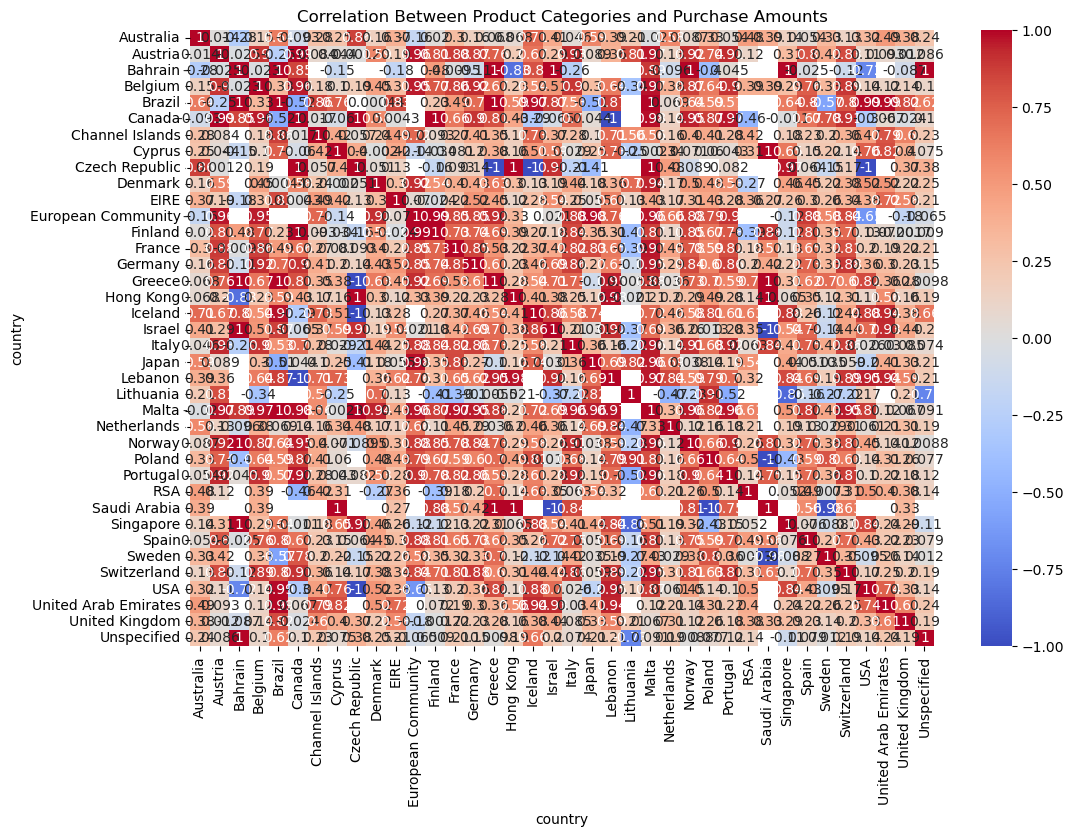

In [8]:
# 4.3 Heatmap: Correlation Between Product Categories and Purchase Amounts
af.plot_heatmap(df_analysis)

In [9]:
# Step 5: Customer Segmentation
customer_segments = af.segment_customers(df_analysis)
print("Customer Segmentation:\n", customer_segments)

Customer Segmentation:
 total_purchase
Segment 1    1458
Segment 3    1458
Segment 2    1457
Name: count, dtype: int64


In [10]:
# Step 6: Analyze Seasonal Trends
seasonal_trends = af.analyze_seasonal_trends(df_analysis)
print("Seasonal Trends:\n", seasonal_trends)

Seasonal Trends:
 description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
month                                                                         
1                                      5.10                            0.00   
2                                      2.55                            0.00   
3                                      0.00                            0.00   
4                                     20.40                            0.00   
5                                      7.65                            0.00   
6                                      5.10                            0.00   
7                                      7.65                            0.00   
8                                      2.55                           34.92   
9                                     22.95                          416.17   
10                                     7.65                         1167.09   
11                                

In [11]:
# Optional: Visualize Seasonal Trends
import matplotlib.pyplot as plt

seasonal_trends.plot(figsize=(12, 8))
plt.title('Seasonal Sales Trends by Product Category')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Month')
plt.show()

KeyboardInterrupt: 